In [28]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=6)

import warnings
warnings.simplefilter(action='ignore')

#https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [29]:
# Read CSV
file_name1 = 'stroke.csv'
stroke_df = pd.read_csv(file_name1)

# preview data
print(stroke_df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [30]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


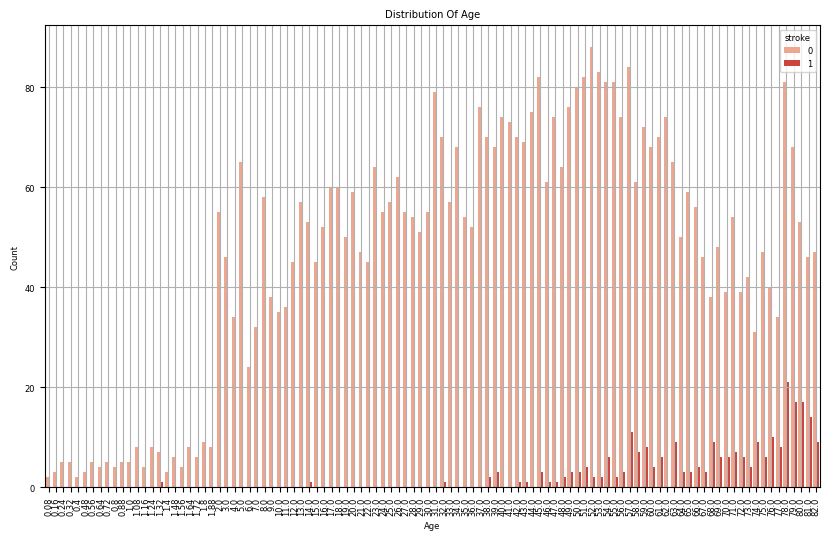

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.title("Distribution Of Age")
plt.grid(True)
plt.show()


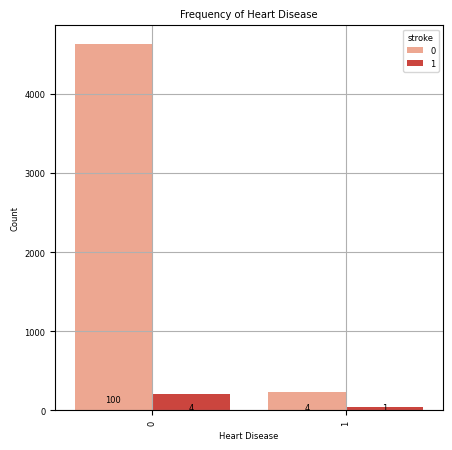

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
ax = sns.countplot(x='heart_disease', hue='stroke', data=stroke_df, palette='Reds')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.title("Frequency of Heart Disease")
plt.grid(True)

for p in ax.patches:
    height = (p.get_height()/4632)*100
    ax.text(p.get_x() + p.get_width() / 2.,
            height+3,
            int(height),
            ha="center")

plt.show()


In [33]:
print(stroke_df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [34]:
(stroke_df['bmi'].isnull().sum()/len(stroke_df))*100

3.9334637964774952

In [35]:
stroke_df['bmi'].mean()

28.893236911794673

In [36]:
stroke_df['bmi'].median()

28.1

In [37]:
(stroke_df['avg_glucose_level'].isnull().sum()/len(stroke_df))*100

0.0

In [38]:
stroke_df['avg_glucose_level'].value_counts().idxmax()

93.88

In [39]:
stroke_df2 = stroke_df.copy()

median2 = stroke_df['bmi'].median()
stroke_df2['bmi'].fillna(median2, inplace = True)

most = stroke_df['avg_glucose_level'].value_counts().idxmax()
stroke_df2['avg_glucose_level'].fillna(most, inplace = True)

In [40]:
stroke_df2.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [41]:
#copy the df
training_data = stroke_df2.copy()
training_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [42]:
#Dropping columns
training_data = stroke_df2.copy()
training_data.drop(columns = "id", axis = 1, inplace = True)
training_data.drop(columns = "stroke", axis = 1, inplace = True)
training_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [43]:
training_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

In [46]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [47]:
stroke_prepared = preprocessing.fit_transform(training_data)
stroke_prepared

array([[ 1.05143428, -0.32860186,  4.18503199, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.78607007, -0.32860186, -0.2389468 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.62639008, -0.32860186,  4.18503199, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.36384151, -0.32860186, -0.2389468 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.34379639, -0.32860186, -0.2389468 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.03420481, -0.32860186, -0.2389468 , ...,  0.        ,
         0.        ,  0.        ]])

LOGISTIC REGRESSION MODEL ACCURACY

In [81]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
import pandas as pd

X = stroke_prepared
y = stroke_df2['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_preprocessed = cat_pipeline.fit_transform(X_train)
X_test_preprocessed = cat_pipeline.transform(X_test)

pipeline1 = Pipeline(steps=[
    ('preprocessor', cat_pipeline),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline1.fit(X_train, y_train)

y_pred = pipeline1.predict(X_test)

pipeline1

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [82]:
accuracy = pipeline1.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9373776908023483


In [83]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.3333333333333333
Recall: 0.03225806451612903
F1 Score: 0.0588235294117647


DNN

Epoch 1/100
128/128 - 2s - 12ms/step - accuracy: 0.9393 - loss: 0.2377 - val_accuracy: 0.9393 - val_loss: 0.2004
Epoch 2/100
128/128 - 1s - 4ms/step - accuracy: 0.9543 - loss: 0.1665 - val_accuracy: 0.9393 - val_loss: 0.1877
Epoch 3/100
128/128 - 0s - 2ms/step - accuracy: 0.9540 - loss: 0.1599 - val_accuracy: 0.9393 - val_loss: 0.1834
Epoch 4/100
128/128 - 0s - 2ms/step - accuracy: 0.9540 - loss: 0.1575 - val_accuracy: 0.9393 - val_loss: 0.1853
Epoch 5/100
128/128 - 0s - 2ms/step - accuracy: 0.9543 - loss: 0.1537 - val_accuracy: 0.9393 - val_loss: 0.1874
Epoch 6/100
128/128 - 0s - 2ms/step - accuracy: 0.9543 - loss: 0.1520 - val_accuracy: 0.9393 - val_loss: 0.1837
Epoch 7/100
128/128 - 0s - 2ms/step - accuracy: 0.9540 - loss: 0.1512 - val_accuracy: 0.9393 - val_loss: 0.1817
Epoch 8/100
128/128 - 0s - 2ms/step - accuracy: 0.9543 - loss: 0.1501 - val_accuracy: 0.9393 - val_loss: 0.1836
Epoch 9/100
128/128 - 0s - 2ms/step - accuracy: 0.9543 - loss: 0.1517 - val_accuracy: 0.9393 - val_loss

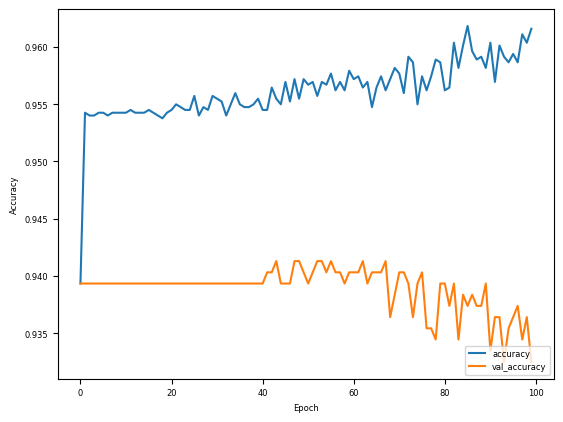

In [54]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = stroke_prepared
y = stroke_df['stroke']

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9492 - loss: 0.2065 - val_accuracy: 0.9393 - val_loss: 0.1846
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.1565 - val_accuracy: 0.9393 - val_loss: 0.1987
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9499 - loss: 0.1549 - val_accuracy: 0.9393 - val_loss: 0.1840
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - loss: 0.1506 - val_accuracy: 0.9393 - val_loss: 0.1840
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9519 - loss: 0.1476 - val_accuracy: 0.9393 - val_loss: 0.1896
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9515 - loss: 0.1510 - val_accuracy: 0.9393 - val_loss: 0.1846
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9543 - loss: 0.1360 - val_accuracy: 0.9393 - val_loss: 0.1887
Epoch 8/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9487 - loss: 0.1512 - val_accu

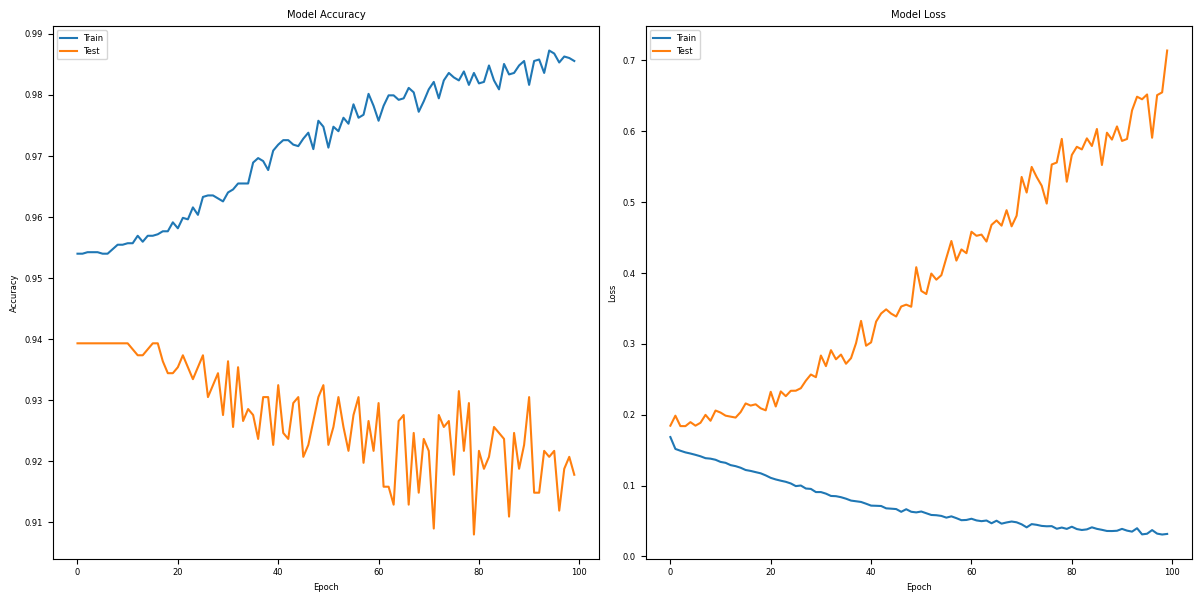

In [70]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()



DNN CLASSIFICATION REPORT

In [71]:
from sklearn.metrics import classification_report

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.21      0.13      0.16        62

    accuracy                           0.92      1022
   macro avg       0.58      0.55      0.56      1022
weighted avg       0.90      0.92      0.91      1022



In [72]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.21052631578947367
Recall: 0.12903225806451613
F1 Score: 0.15999999999999998


RANDOM FOREST ACCURACY

In [84]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]


Accuracy: 0.9393346379647749


In [85]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.0
Recall: 0.0
F1 Score: 0.0


SUPPORT VECTOR MACHINE

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_model = SVC(kernel='linear', random_state=42)  
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('svm', SVC(kernel='rbf'))     
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],     
    'svm__gamma': [0.001, 0.01, 0.1] 
}

grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_svm_model = grid_search.best_estimator_

y_pred = best_svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.33      0.06      0.11        62

    accuracy                           0.94      1022
   macro avg       0.64      0.53      0.54      1022
weighted avg       0.91      0.94      0.91      1022



In [80]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.3333333333333333
Recall: 0.06451612903225806
F1 Score: 0.1081081081081081
